# Problema del agricultor (granjero)

Un granjero tiene $150$ hectáreas de tierra en la cuál quiere cultivar algodón y papas. Tiene una restricción gubernamental que le previene al granjero otorgarle más de $60$ hectáreas de tierra al algodón, pero puede usar la cantidad que quiera de papas. Se necesitan $30$ pulgadas por hectarea de agua para el algodón y $15$ para las papas, pero el granjero sólo tiene disponible $3000$. Si la ganancia del granjero por hectárea es de $ \$ 207$ por algodón y $\$200$ por papas, ¿cuántas hactáreas debería otorgarle a cada producto para obtener la mayor ganancia?

Este problema se puede abordar facilmente con programación lineal, descrito desde una perspectiva matemática, se requiere obtener la ganancia máxima $G$ dada por las variables $a$:hectáras de algodón y $p$: hectáreas de papa.  

La siguiente expresión es la que se busca maximizar 

$Maximizar$ $G=207a+200p$ 

Sujeto a: 

$a+p \leq 150$  
$a \leq 60$  
$30a+15p \leq 3000$  
$a \geq 0$  
$p \geq 0$

Estas restricciones fueron obtenidas a partir del texto del problema.

El problema se puede describir fácilmente de una manera gráfica,este se puede observar a continuación

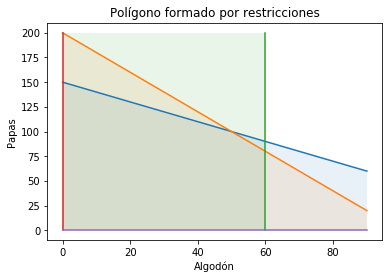

In [166]:
#Usar bibliotecas
import matplotlib.pyplot as plt
import numpy as np

#Creación de  ecuaciones necesarias para graficarlas:
a = np.linspace(0, 90, 10)
p1=150-a
p2=(3000-30*a)/15
p3=0*a
r1=np.linspace(0, 200, 10)
r2=0*a+60
a2=np.linspace(0, 60, 10)

#Instrucciones para graficar:

fig, ax = plt.subplots()
plt.plot(a, p1, label='$a+p \leq 150$')
plt.plot(a, p2, label='$30a+15p \leq 3000$')
plt.plot(r2, r1, label='$a \leq 60$')
plt.plot(0*a,r1, label= '$a \geq 0$')
plt.plot(a,p3, label='$p \geq 0$')

#Instrucciones para rellenar:
plt.fill_between(a, p1, 0, where=p1>0, alpha=0.1)
plt.fill_between(a, p2, 0, where=p2>0, alpha=0.1)
plt.fill_between(a2, 200+0*a2, 0, where=(a2*0+200)>0, alpha=.1)
#plt.fill_between(a, 200+0*a,0, where=(a*0+200)>0, alpha=.1)
#plt.fill_between(a, 200+0*a,0, where=(a*0+200)>0, alpha=.1)

#Nombres de los ejes
plt.title("Polígono formado por restricciones")
plt.xlabel('Algodón')
plt.ylabel('Papas')
plt.show()


Para solucionar este problema se pueden abordar dos casos: Método gráfico o la programación. El problema se solucionará con un problema hecho en python, este se muestra a contínuación

In [3]:
#Programa: Problema del granjero
#Usar librerias
from pulp import *

#Se crea la variable de problema, y se indica si es necesario maximizar o minimizar:
prob=LpProblem("Problema del granjero", LpMaximize)

#Se crean cada una de las variables que se requieren determinar
#Aquí se definen los límites de las variables, es decir que no pueden ser negativas:
a=LpVariable("Hectáreas de algodón:",lowBound=0)
p=LpVariable("Hectáreas de papa:",lowBound=0)

#Se crea la funcion objetivo:
funcion_objetivo=207*a+200*p

#La función objetivo se agrega al problema
prob += funcion_objetivo

#Se crean las restricciones (en este caso solo se tienen 5 restricciones):
restriccion1= a + p  <= 150
restriccion2= a <= 60
restriccion3= 30*a + 15*p <= 3000


#Las restricciones se añaden
prob += restriccion1
prob += restriccion2
prob += restriccion3


#Se soluciona el problema:
prob.solve()

#Resultados impresos:
print ("Status:", LpStatus[prob.status])
for v in prob.variables():
    print(v.name, "=", v.varValue)
print("Valor Óptimo: $", value(prob.objective))

Status: Optimal
Hectáreas_de_algodón: = 50.0
Hectáreas_de_papa: = 100.0
Valor Óptimo: $ 30350.0


Si se quisiera hacer por el método gráfico, se deberían analizar los puntos de las esquinas del polígono formado por las restricciones, estos se evaluarían en la función objetivo y se buscaría obtener el número que maximice la función.

Para obtener los puntos, se pueden igualar las distintas ecuaciones que definen al polígono, se pueden hacer varios sistemas de ecuaciones:

$
\left.30a+15p=3000\atop a= 60\right\} \therefore a=60, p=80
$

$
\left. p+a=150\atop 30a+15p=3000\right\} \therefore a=50, p=100
$

$
\left. a=0\atop p=0\right\} \therefore a=0, p=0
$

$
\left. p+a=150\atop a=0\right\} \therefore a=0, p=150
$

$
\left. p=0\atop a=60\right\} \therefore a=60, p=0
$

Evaluando en la función objetivo estos puntos se pueden obtener los distintos casos

 | Algodón | Papa| Función objetivo | Valor
:-------| --
60| 80 | 207(60)+200(80)  | 28420
**50**| **100** |**207(50)+200(100)** |**30350**
0| 0 |207(0)+200(0)  | 0
0| 150|207(0)+200(150)|30000
60| 0|207(60)+200(0)|12420

De aquí se puede observar que el par de datos que mejor cumplen con las restricciones es otorgarle 50 hectáreas al algodón y 100 a la papa, esto es tal y cómo se había obtenido en el programa. 